In [606]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from scipy import spatial
import ipywidgets
import pandas as pd


from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

In [607]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Exploratory data analysis
##### Summary statistical information

In [608]:
df.data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [609]:
df.data.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [610]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [611]:
df.data.isna()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False


In [612]:
df.data.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [613]:
# Calculate mean of variables
df.data.mean()

age   -3.634285e-16
sex    1.308343e-16
bmi   -8.045349e-16
bp     1.281655e-16
s1    -8.835316e-17
s2     1.327024e-16
s3    -4.574646e-16
s4     3.777301e-16
s5    -3.830854e-16
s6    -3.412882e-16
dtype: float64

In [614]:
# Calculate the median
df.data.median()

age    0.005383
sex   -0.044642
bmi   -0.007284
bp    -0.005671
s1    -0.004321
s2    -0.003819
s3    -0.006584
s4    -0.002592
s5    -0.001948
s6    -0.001078
dtype: float64

In [615]:
# Calculate the mode
df.data.mode()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.016281,-0.044642,-0.030996,-0.040099,-0.037344,-0.001001,-0.013948,-0.039493,-0.018118,0.003064
1,NaN,NaN,-0.024529,-0.005671,-0.007073,0.016222,NaN,NaN,NaN,NaN


In [616]:
# Find the maximum amount in each variables
df.data.max()

age    0.110727
sex    0.050680
bmi    0.170555
bp     0.132044
s1     0.153914
s2     0.198788
s3     0.181179
s4     0.185234
s5     0.133599
s6     0.135612
dtype: float64

In [617]:
# Find the minimum amount in each variables
df.data.min()

age   -0.107226
sex   -0.044642
bmi   -0.090275
bp    -0.112400
s1    -0.126781
s2    -0.115613
s3    -0.102307
s4    -0.076395
s5    -0.126097
s6    -0.137767
dtype: float64

In [618]:
# Find the minimum amount in each variables
df.data.n()

AttributeError: 'DataFrame' object has no attribute 'n'

In [619]:
# Calculate the variance
df.data.var()

age    0.002268
sex    0.002268
bmi    0.002268
bp     0.002268
s1     0.002268
s2     0.002268
s3     0.002268
s4     0.002268
s5     0.002268
s6     0.002268
dtype: float64

In [620]:
# Calculate the standard deviation
df.data.std()

age    0.047619
sex    0.047619
bmi    0.047619
bp     0.047619
s1     0.047619
s2     0.047619
s3     0.047619
s4     0.047619
s5     0.047619
s6     0.047619
dtype: float64

##### Histograms and scatter plots

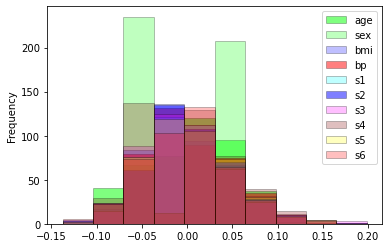

In [621]:
# Plotting histogram of all variables in one 
colors = ((0,1,0,0.5),(0,1,0,0.25),(0,0,1,0.25),(1,0,0,0.5),(0,1,1,0.25),
          (0,0,1,0.5),(1,0,1,0.25),(0.5,0,0,0.25),(1,1,0,0.25),(1,0,0,0.25))
edgecolor = 0,0,0,0.25
ax = (df.data).plot.hist(figsize=(6, 4),color = colors, edgecolor = edgecolor)


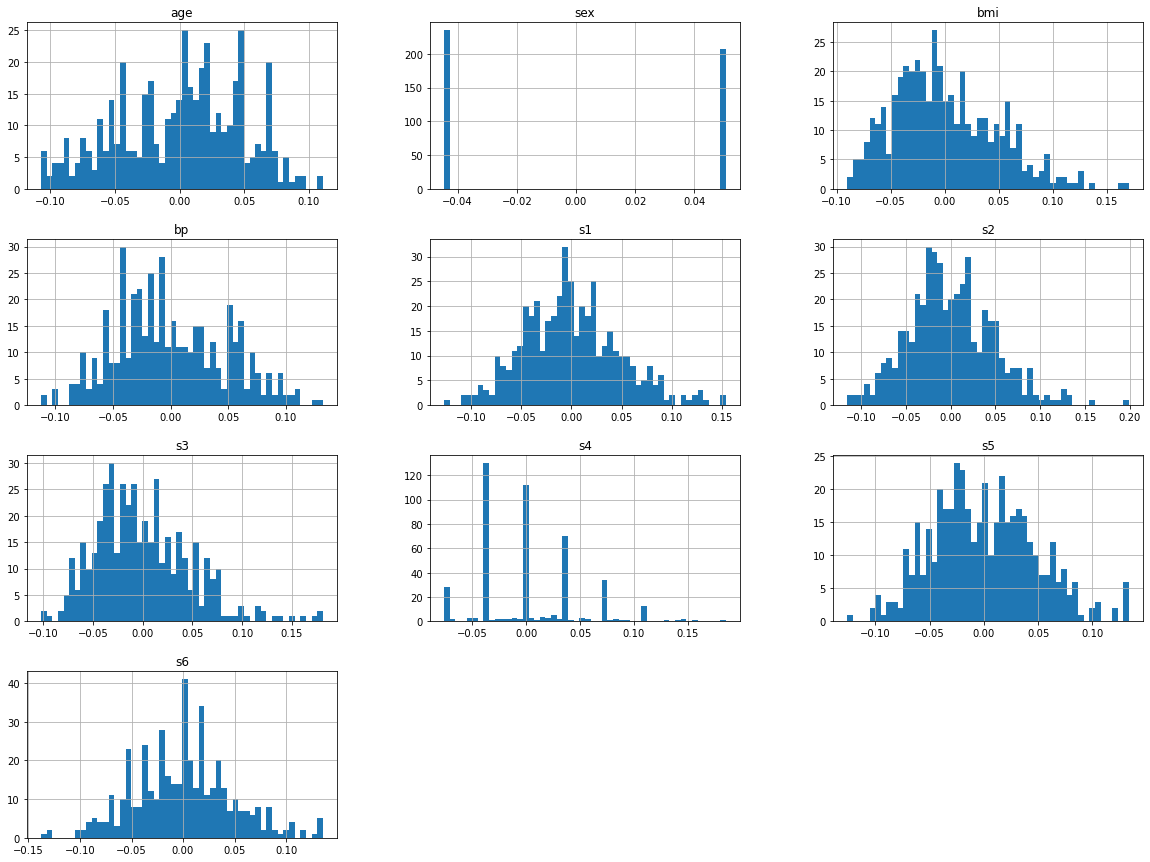

In [622]:
# Plotting histograms
df.data.hist(bins=50,figsize=(20,15))
plt.show()

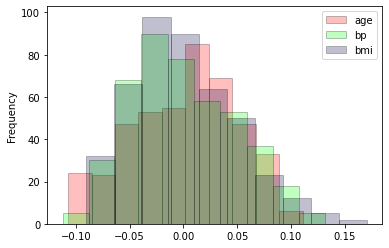

In [623]:
# Plotting histigrams of age, bp, bmi
ax = (df.data['age']).plot.hist(figsize=(6, 4), color = (1,0,0,0.25), edgecolor = edgecolor)
ax = (df.data['bp']).plot.hist(figsize=(6, 4), color = (0,1,0,0.25), edgecolor = edgecolor)
ax = (df.data['bmi']).plot.hist(figsize=(6, 4), color = (0,0,.25,0.25), edgecolor = edgecolor)

plt.legend()

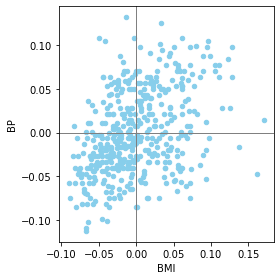

In [624]:
# Plotting scatterplot of bmi and bp
ax = df.data.plot.scatter(x='bmi', y='bp', figsize=(4, 4), color="skyblue")
ax.set_xlabel('BMI')
ax.set_ylabel('BP')
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

plt.tight_layout()
plt.show()

#### Find the column in features_df that has the highest correlation coefficient with the target values in target_df

In [625]:
df.data.corr().style.background_gradient(cmap="YlOrBr")
# From the below chart, s1 and s2 are highly correlated with number of 0.896663.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


#### Split the data into a training set and test set


In [626]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [627]:
np.random.seed(0)

In [628]:
Xactual = np.linspace(0, 1, 442)
yactual = true_fun(Xactual)

In [629]:
n_samples = 50
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [630]:
X

array([0.0187898 , 0.0202184 , 0.06022547, 0.07103606, 0.0871293 ,
       0.11827443, 0.1289263 , 0.14335329, 0.21038256, 0.26455561,
       0.31542835, 0.3595079 , 0.36371077, 0.38344152, 0.41466194,
       0.4236548 , 0.43703195, 0.43758721, 0.45615033, 0.46147936,
       0.52184832, 0.52889492, 0.54488318, 0.5488135 , 0.56804456,
       0.56843395, 0.60276338, 0.61209572, 0.616934  , 0.6176355 ,
       0.63992102, 0.64589411, 0.66676672, 0.67063787, 0.6818203 ,
       0.6976312 , 0.71518937, 0.77423369, 0.77815675, 0.78052918,
       0.79172504, 0.79915856, 0.83261985, 0.87001215, 0.891773  ,
       0.92559664, 0.94374808, 0.94466892, 0.96366276, 0.97861834])

In [631]:
np.random.seed(49)

In [632]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [633]:
train_test, test_set = split_train_test(df.data, 0.2)
len(test_set)

88

In [634]:
test_set.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
421,0.038076,0.050680,0.016428,0.021872,0.039710,0.045032,-0.043401,0.071210,0.049769,0.015491
285,0.012648,-0.044642,-0.020218,-0.015999,0.012191,0.021233,-0.076536,0.108111,0.059881,-0.021788
291,0.074401,-0.044642,0.018584,0.063187,0.061725,0.042840,0.008142,-0.002592,0.058039,-0.059067
269,0.009016,-0.044642,-0.032073,-0.026328,0.042462,-0.010395,0.159089,-0.076395,-0.011901,-0.038357
366,-0.045472,0.050680,0.137143,-0.015999,0.041086,0.031880,-0.043401,0.071210,0.071022,0.048628


#### Using this feature and target, perform linear regression with sklearn's LinearRegression

In [635]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df.data[['bmi']]
y = df.data[['bp']]

In [636]:
X.head()

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385


In [637]:
y.head()

,bp
0,0.021872
1,-0.026328
2,-0.005671
3,-0.036656
4,0.021872


In [638]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [639]:
scaler = StandardScaler()

In [640]:
X_train = scaler.fit_transform(X_train)

In [641]:
X_test = scaler.transform(X_test)

In [642]:
linear_regression = LinearRegression()
model = linear_regression.fit(X_train, y_train)

In [643]:
y_pred = model.predict(X_test)

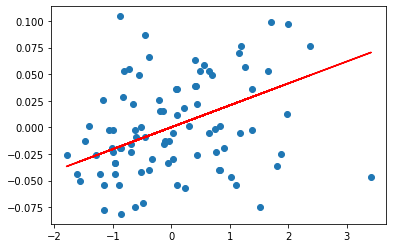

In [649]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [593]:
print("Training score : ", linear_regression.score(X_train, y_train))

Training score :  0.1638597509212153


#### Print the coefficients of the model

In [678]:
lindf = pd.DataFrame(X)

In [679]:
reg = LinearRegression().fit(lindf, y)

In [680]:
print(reg.coef_)

[[0.39541532]]


In [681]:
reg.intercept_

array([4.45865713e-16])

#### Plot the linear fit together with the training data

In [682]:
ytrain = reg.intercept_ + reg.coef_ * x

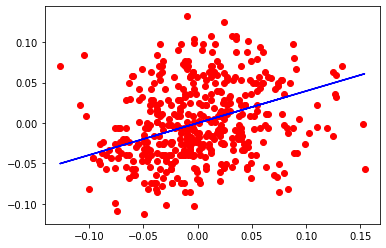

In [683]:
plt.plot(x,y,'ro',x,ytrain,'b-');

#### Use the model to generate predictions on the test data and then compare against the actual target values by calculating the mean squared error and R-squared values.

In [724]:
from sklearn.metrics import mean_squared_error, r2_score
reg.score(lindf, y)

0.8040044599094561

In [725]:
mean_squared_error(y, ytrain)

0.0010118659125248743

In [726]:
r2_score(y, ytrain)

0.5527552666639988

In [727]:
lindf2 = pd.DataFrame(x2)

In [728]:
ytest = 5 + 0.5* x2 + np.random.normal(0, 5, len(x2))

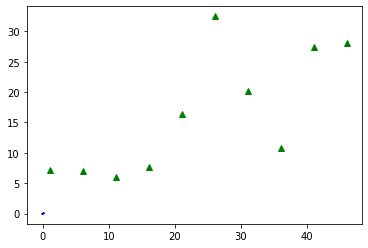

In [723]:
plt.plot(x,ytrain,'b-',x2,ytest,'g^');

#### Try doing linear regression with other variables and/or multiple variables and comment on how each choice changes the mean squared error and R-squared values.

In [709]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x = df.data[['s1']]
y = df.data[['s2']]

In [710]:
lindf = pd.DataFrame(x)

In [711]:
reg = LinearRegression().fit(lindf, y)

In [712]:
print(reg.coef_)

[[0.89666296]]


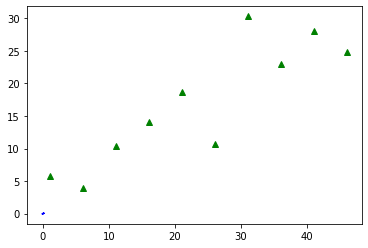

In [713]:
plt.plot(x,ytrain,'b-',x2,ytest,'g^');

In [715]:
reg.intercept_

array([2.11193221e-16])

#### Try at least one other regression algorithm as well 

In [736]:
X = features_df  # we only take the first two features.
Y = target_df

In [737]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [742]:
logreg.fit(X, Y)

LogisticRegression()

# Clustering

In [743]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
df = pd.DataFrame(X, columns=['x1','x2'])

#### Generate a scatter plot of the data to view the points

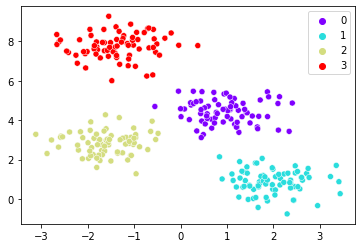

In [744]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,palette='rainbow');

#### Use sklearn's KMeans to identify 4 clusters

In [750]:
kmeans = KMeans(n_clusters=4)

In [751]:
kmeans.fit(X)

KMeans(n_clusters=4)

In [752]:
kmeans.labels_

array([1, 2, 3, 2, 1, 1, 0, 3, 2, 2, 0, 2, 3, 2, 1, 3, 3, 1, 0, 0, 1, 1,
       3, 0, 0, 3, 1, 3, 0, 3, 2, 2, 3, 2, 2, 2, 2, 2, 0, 1, 3, 0, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 1, 2, 0, 3, 0, 2, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 1, 2, 3, 1, 3,
       2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 3, 2, 3,
       0, 0, 1, 2, 1, 3, 2, 1, 1, 3, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       0, 1, 2, 0, 0, 2, 3, 2, 2, 0, 3, 0, 3, 0, 2, 3, 2, 2, 2, 3, 2, 3,
       1, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 0, 0, 3, 1, 3, 3, 2, 1, 3, 0, 2,
       1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 2, 3, 0, 3, 3, 0, 0, 0, 3,
       0, 2, 3, 0, 1, 0, 3, 2, 0, 2, 3, 2, 3, 0, 3, 3, 2, 0, 0, 1, 1, 3,
       2, 1, 1, 0, 1, 0, 3, 2, 2, 3, 3, 2, 3, 1, 0, 3, 1, 0, 2, 0, 1, 3,
       1, 2, 2, 2, 2, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 1, 1, 2, 3, 3, 0, 1,
       2, 0, 3, 2, 3, 1, 1, 0, 0, 3, 1, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1,
       2, 0, 2, 3, 1, 1, 2, 2, 2, 1, 1, 3, 2, 0])

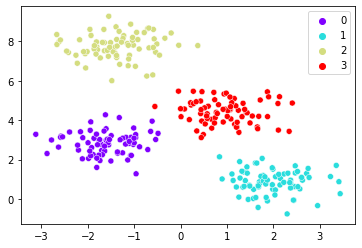

In [753]:
sns.scatterplot(x=X[:,0],
                y=X[:,1],
                hue=kmeans.labels_,
                palette='rainbow');

#### Generate another scatter plot of the data with the points colored by cluster to see how the algorithm fared

In [763]:
def kmeans_make_blobs(n_clusters=4):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    sns.scatterplot(x=X[:,0],
                    y=X[:,1],
                    hue=kmeans.labels_,
                    palette='rainbow')
ipywidgets.interact(kmeans_make_blobs,n_clusters=(1,50));

interactive(children=(IntSlider(value=4, description='n_clusters', max=50, min=1), Output()), _dom_classes=('w…

#### Repeat with different parameter values in the call to KMeans, as well as for different parameters in the initial "blob"-formation with make_blobs, to see where KMeans does a good job and where it doesn't

In [757]:
kmeans.cluster_centers_

array([[-1.58438467,  2.83081263],
       [ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [ 0.94973532,  4.41906906]])

In [758]:
kmeans.cluster_centers_[:,0]

array([-1.58438467,  1.98258281, -1.37324398,  0.94973532])

In [767]:
make_blobs

<function sklearn.datasets._samples_generator.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None, return_centers=False)>

In [765]:
make_blobs.append(pd.DataFrame(kmeans.cluster_centers_,columns=make_blobs.columns),ignore_index=True)

AttributeError: 'function' object has no attribute 'append'

In [769]:
def kmeans_make_blobs(n_clusters=3):
    kmeans = KMeans(n_clusters, n_init=50)
    kmeans.fit(make_blobs)
    fig = px.scatter_3d(make_blobs.append(pd.DataFrame(kmeans.cluster_centers_,columns=make_blobs.columns),ignore_index=True),
                        x='sepal width (cm)',
                        y='petal length (cm)',
                        z='petal width (cm)',
                        color=list(kmeans.labels_)+[max(kmeans.labels_)+1]*n_clusters,
                        size=list(kmeans.labels_+10)+[max(kmeans.labels_+10)*3]*n_clusters,
                       color_continuous_scale='jet')
    fig.show()

ipywidgets.interact(kmeans_make_blobs,n_clusters=(1,10));

interactive(children=(IntSlider(value=3, description='n_clusters', max=10, min=1), Output()), _dom_classes=('w…